# Forming Queries through the API!

Get familiar with the tools available for querying the database. The simplest way is to use the api classes 
* [`snowexsql.api.PointMeasurements`](https://github.com/SnowEx/snowexsql/blob/830fa76de8cf13c5101e1b4b663c1b399f81d7e6/snowexsql/api.py#L185)
* [`snowexsql.api.LayerMeasurements`](https://github.com/SnowEx/snowexsql/blob/830fa76de8cf13c5101e1b4b663c1b399f81d7e6/snowexsql/api.py#L262).

* Each class has to very useful functions
  1. [`from_filter`](https://github.com/SnowEx/snowexsql/blob/830fa76de8cf13c5101e1b4b663c1b399f81d7e6/snowexsql/api.py#L192)
  2. [`from_area`](https://github.com/SnowEx/snowexsql/blob/830fa76de8cf13c5101e1b4b663c1b399f81d7e6/snowexsql/api.py#L210)

## `from_filter`

,depth,site_id,pit_id,bottom_depth,comments,sample_a,sample_b,sample_c,value,flags,...,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,observers
0,37.0,Banner Snotel,IDBRBS_20191218_1000,27.0,None,None,None,None,167.0,AD,...,2019-12-18,2024-08-13 17:49:44.561044+00:00,None,2178928,https://doi.org/10.5067/KZ43HVLZV6G4,2024-08-13,None,density,None,None
1,47.0,Bogus Upper,IDBRBU_20191219_1000,37.0,None,232.0,237.0,-9999,-3176.6666666666665,AD,...,2019-12-19,2024-08-13 17:48:18.956152+00:00,None,2162916,https://doi.org/10.5067/KZ43HVLZV6G4,2024-08-13,None,density,None,None
2,37.0,Bogus Upper,IDBRBU_20191219_1000,27.0,None,249.0,252.0,-9999,-3166.0,AD,...,2019-12-19,2024-08-13 17:48:18.956152+00:00,None,2162917,https://doi.org/10.5067/KZ43HVLZV6G4,2024-08-13,None,density,None,None
3,27.0,Bogus Upper,IDBRBU_20191219_1000,17.0,None,286.0,296.0,-9999,-3139.0,AD,...,2019-12-19,2024-08-13 17:48:18.956152+00:00,None,2162918,https://doi.org/10.5067/KZ43HVLZV6G4,2024-08-13,None,density,None,None
4,17.0,Bogus Upper,IDBRBU_20191219_1000,7.0,None,268.0,265.0,-9999,-3155.3333333333335,AD,...,2019-12-19,2024-08-13 17:48:18.956152+00:00,None,2162919,https://doi.org/10.5067/KZ43HVLZV6G4,2024-08-13,None,density,None,None
5,47.0,Bogus Upper,IDBRBU_20191219_1000,37.0,None,None,None,None,234.5,AD,...,2019-12-19,2024-08-13 17:48:19.004814+00:00,None,2162920,https://doi.org/10.5067/KZ43HVLZV6G4,2024-08-13,None,density,None,None
6,37.0,Bogus Upper,IDBRBU_20191219_1000,27.0,None,None,None,None,250.5,AD,...,2019-12-19,2024-08-13 17:48:19.004814+00:00,None,2162921,https://doi.org/10.5067/KZ43HVLZV6G4,2024-08-13,None,density,None,None
7,27.0,Bogus Upper,IDBRBU_20191219_1000,17.0,None,None,None,None,291.0,AD,...,2019-12-19,2024-08-13 17:48:19.004814+00:00,None,2162922,https://doi.org/10.5067/KZ43HVLZV6G4,2024-08-13,None,density,None,None
8,17.0,Bogus Upper,IDBRBU_20191219_1000,7.0,None,None,None,None,266.5,AD,...,2019-12-19,2024-08-13 17:48:19.004814+00:00,None,2162923,https://doi.org/10.5067/KZ43HVLZV6G4,2024-08-13,None,density,None,None
9,21.0,Banner Open,IDBRBO_20191218_1424,11.0,None,None,None,None,228.0,AD,...,2019-12-18,2024-08-13 17:49:47.341833+00:00,None,2179263,https://doi.org/10.5067/KZ43HVLZV6G4,2024-08-13,None,density,None,None


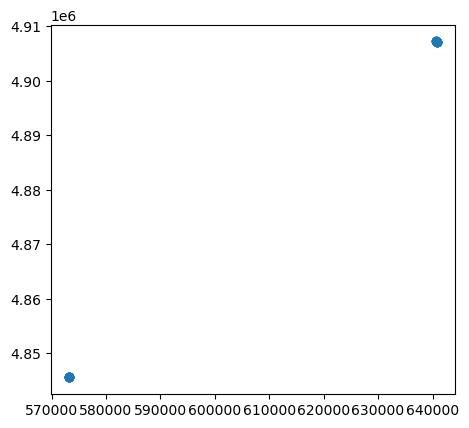

In [4]:
# Import in our two classes to access the db
from snowexsql.api import LayerMeasurements, PointMeasurements
from datetime import datetime 

# Find some density pit measurements at the Boise site in december 2019.
df = LayerMeasurements.from_filter(
    type="density",
    site_name="Boise River Basin",
    date_less_equal=datetime(2020, 1, 1),
    date_greater_equal=datetime(2019, 12, 1),
)

# Plot it up!
df.plot()

# Show off the dataframe
df

## `from_area`

,depth,site_id,pit_id,bottom_depth,comments,sample_a,sample_b,sample_c,value,flags,...,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,observers
0,84.0,1C5,COGM1C5_20200212,None,None,None,None,None,45.6,None,...,2020-02-12,2024-08-13 17:57:56.560918+00:00,None,2184545,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Kate Hale
1,79.0,1C5,COGM1C5_20200212,None,None,None,None,None,38.2,None,...,2020-02-12,2024-08-13 17:57:56.560918+00:00,None,2184546,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Kate Hale
2,74.0,1C5,COGM1C5_20200212,None,None,None,None,None,24.5,None,...,2020-02-12,2024-08-13 17:57:56.560918+00:00,None,2184547,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Kate Hale
3,69.0,1C5,COGM1C5_20200212,None,None,None,None,None,23.5,None,...,2020-02-12,2024-08-13 17:57:56.560918+00:00,None,2184548,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Kate Hale
4,64.0,1C5,COGM1C5_20200212,None,None,None,None,None,22.4,None,...,2020-02-12,2024-08-13 17:57:56.560918+00:00,None,2184549,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Kate Hale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,28.0,1C1,COGM1C1_20200131,None,None,None,None,None,13.1,None,...,2020-01-31,2024-08-13 17:58:01.182985+00:00,None,2186850,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Juha Lemmetyinen & Ioanna Merkouriadi
156,23.0,1C1,COGM1C1_20200131,None,None,None,None,None,10.1,None,...,2020-01-31,2024-08-13 17:58:01.182985+00:00,None,2186851,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Juha Lemmetyinen & Ioanna Merkouriadi
157,18.0,1C1,COGM1C1_20200131,None,None,None,None,None,10.6,None,...,2020-01-31,2024-08-13 17:58:01.182985+00:00,None,2186852,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Juha Lemmetyinen & Ioanna Merkouriadi
158,13.0,1C1,COGM1C1_20200131,None,None,None,None,None,10.5,None,...,2020-01-31,2024-08-13 17:58:01.182985+00:00,None,2186853,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Juha Lemmetyinen & Ioanna Merkouriadi


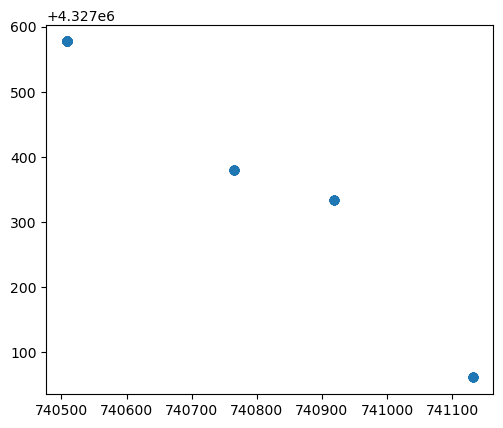

In [5]:
# Import our api class
from snowexsql.api import LayerMeasurements
from datetime import datetime

# import some gis functionality 
from shapely.geometry import Point 

# Find some SSA measurements within a distance of a known point
df = LayerMeasurements.from_area(pt=Point(740820.624625,4.327326e+06), crs=26912, buffer=500,
    type='specific_surface_area')

# plot it up
df.plot()

# show off the dataframe
df

### How do I know what to filter on?
We got tools for that! Each class has a host of functions that start with `all_*` these function return the unique value in that column. 

 * `all_types` - all the data types e.g. depth, swe, density...
 * `all_instruments` - all instruments available in the table
 * `all_dates` - all dates listed in the table
 * `all_site_names` - all the site names available in the table. e.g. Grand Mesa

In [7]:
from snowexsql.api import PointMeasurements

# Instatiate the class to use the properties!
measurements = PointMeasurements()

# Get the unique data names/types in the table
results = measurements.all_types
print('Available types = {}'.format(', '.join([str(r) for r in results])))

# Get the unique instrument in the table
results = measurements.all_instruments
print('\nAvailable Instruments = {}'.format(', '.join([str(r) for r in results])))

# Get the unique dates in the table
results = measurements.all_dates
print('\nAvailable Dates = {}'.format(', '.join([str(r) for r in results])))

# Get the unique site names in the table
results = measurements.all_site_names
print('\nAvailable sites = {}'.format(', '.join([str(r) for r in results])))

Available types = swe, depth, two_way_travel

Available Instruments = Mala 1600 MHz GPR, None, Mala 800 MHz GPR, pulse EKKO Pro multi-polarization 1 GHz GPR, pit ruler, mesa, magnaprobe, camera

Available Dates = 2020-05-28, 2020-01-09, 2020-05-23, 2020-01-04, 2019-11-29, 2019-10-20, 2019-11-30, 2020-04-17, 2020-02-19, 2020-02-26, 2020-02-03, 2020-05-05, 2019-10-05, 2019-12-29, 2020-06-02, 2019-10-28, 2020-01-30, 2020-05-22, 2020-03-09, 2019-12-09, 2019-12-28, 2020-02-24, 2020-03-17, 2020-04-01, 2020-05-14, 2019-10-29, 2019-10-14, 2019-10-02, 2020-01-31, 2020-04-18, 2020-04-29, 2020-04-26, 2019-10-12, 2020-02-23, 2020-01-22, 2020-01-01, 2019-11-21, 2020-05-10, 2020-02-12, 2020-05-06, 2019-11-19, 2019-10-25, 2019-11-02, 2020-02-08, 2020-04-14, 2020-04-02, 2019-11-16, 2020-04-07, 2019-12-27, 2019-10-01, 2020-04-16, 2020-06-08, 2019-12-13, 2019-10-17, 2019-10-22, 2020-04-21, 2020-01-03, 2019-12-12, 2019-12-08, 2020-01-25, 2020-02-29, 2019-11-24, 2019-10-18, 2020-05-09, 2020-03-22, 2019-11

#### More specific filtering options
Sometimes we need a bit more filtering to know more about what I can filter on. Questions like "What dates was the SMP used?" are a bit more complicated than "Give me all the dates for snowex"

The good news is, we have tool for that! `from_unique_entries` is your friend!

In [3]:
# import layer measurements
from snowexsql.api import LayerMeasurements

# Query dates where SMP was used
LayerMeasurements.from_unique_entries(['date'], instrument='snowmicropen')

[datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 6),
 datetime.date(2020, 2, 11),
 datetime.date(2020, 2, 12),
 datetime.date(2020, 1, 30),
 datetime.date(2020, 2, 10),
 datetime.date(2020, 1, 31),
 datetime.date(2020, 2, 1),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 8),
 datetime.date(2020, 2, 5),
 datetime.date(2020, 1, 29),
 datetime.date(2020, 1, 28)]

## Query Nuances
### Limit size 
To avoid accidental large queries, we have added some bumper rails. By default if you ask for more than 1000 records then an error will pop up unless you explicitly say you want more. 

Try doing a large query. Something like the following to see the error:

In [4]:
# Import PointMeasurements
from snowexsql.api import PointMeasurements

# Query db using a vague filter or on a huge dataset like GPR
df = PointMeasurements.from_filter(type='two_way_travel')

# Show the dataframe
df

# Throws an exception, try adding the limit keyword arg in the function

Failed query for PointData


LargeQueryCheckException: Query will return 2296512 number of records, but we have a default max of 1000. If you want to proceed, set the 'limit' filter to the desired number of records.

We have added this on the db to allow you to explore without accidentally pulling the entire SnowEx universe down. If you know you want a large query (defined as > 1000) then use the `limit = ####` option in the `from_filter` or `from_area` function.

**Warning** - It is better to filter using other things besides the limit because the limit is not intelligent. It will simply limit the query by the order of entries that were submitted AND fits your filter. So if you encounter this then consider how to tighten up the filter.

### List of Criteria
You can use lists in your requests too!

In [7]:
# Import layer measurements
from snowexsql.api import LayerMeasurements

# Grab all the data that used the one of these instruments (hint hint SSA)
ssa_instruments = ["IS3-SP-15-01US", "IRIS",  "IS3-SP-11-01F"]

# Query the DB (throw a limit for safety)
LayerMeasurements.from_filter(instrument=ssa_instruments, limit=100)

,depth,site_id,pit_id,bottom_depth,comments,sample_a,sample_b,sample_c,value,flags,...,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,observers
0,91.0,2C12,COGM2C12_20200212,None,None,None,None,None,45.02,None,...,2020-02-12,2022-06-30 22:37:00.759127+00:00,None,12524,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,reflectance,None,Kate Hale
1,86.0,2C12,COGM2C12_20200212,None,None,None,None,None,39.82,None,...,2020-02-12,2022-06-30 22:37:00.759127+00:00,None,12525,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,reflectance,None,Kate Hale
2,81.0,2C12,COGM2C12_20200212,None,None,None,None,None,37.85,None,...,2020-02-12,2022-06-30 22:37:00.759127+00:00,None,12526,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,reflectance,None,Kate Hale
3,76.0,2C12,COGM2C12_20200212,None,None,None,None,None,35.11,None,...,2020-02-12,2022-06-30 22:37:00.759127+00:00,None,12527,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,reflectance,None,Kate Hale
4,71.0,2C12,COGM2C12_20200212,None,None,None,None,None,34.86,None,...,2020-02-12,2022-06-30 22:37:00.759127+00:00,None,12528,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,reflectance,None,Kate Hale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,72.0,2C13,COGM2C13_20200212,None,None,None,None,None,40.5,None,...,2020-02-12,2022-06-30 22:37:00.946617+00:00,None,12619,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Kate Hale
96,67.0,2C13,COGM2C13_20200212,None,None,None,None,None,22.6,None,...,2020-02-12,2022-06-30 22:37:00.946617+00:00,None,12620,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Kate Hale
97,62.0,2C13,COGM2C13_20200212,None,None,None,None,None,26.6,None,...,2020-02-12,2022-06-30 22:37:00.946617+00:00,None,12621,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Kate Hale
98,57.0,2C13,COGM2C13_20200212,None,None,None,None,None,24.3,None,...,2020-02-12,2022-06-30 22:37:00.946617+00:00,None,12622,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Kate Hale


### Greater than or Less than
Sometimes we want to isolate certain ranges of value or even dates. The `greater_equal` and `less_equal` terms can be added on to `value` or `dates`. 

* `date_greater_equal`
* `date_less_equal`
* `value_greater_equal`
* `value_less_equal`
 

In [8]:
# Import the point measurements class
from snowexsql.api import PointMeasurements

# Filter values > 100 cm from the pulse ecko GPR
df = PointMeasurements.from_filter(value_greater_equal=100, type='depth', instrument='pulse EKKO Pro multi-polarization 1 GHz GPR', limit=100)

# Show off the dataframe
df

,version_number,equipment,value,latitude,longitude,northing,easting,elevation,utm_zone,geom,...,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,observers
0,None,None,101.096736,39.034358,-108.190907,4.324345e+06,743146.962029,None,12,POINT (743146.962 4324344.879),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320356,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
1,None,None,101.096736,39.034358,-108.190907,4.324345e+06,743146.933029,None,12,POINT (743146.933 4324344.839),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320357,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
2,None,None,103.532801,39.034350,-108.190913,4.324344e+06,743146.462029,None,12,POINT (743146.462 4324343.986),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320378,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
3,None,None,104.750834,39.034350,-108.190913,4.324344e+06,743146.454029,None,12,POINT (743146.454 4324343.945),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320379,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
4,None,None,104.750834,39.034350,-108.190913,4.324344e+06,743146.447029,None,12,POINT (743146.447 4324343.904),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320380,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,None,None,109.622966,39.034313,-108.190909,4.324340e+06,743146.897029,None,12,POINT (743146.897 4324339.877),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320471,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
96,None,None,109.622966,39.034313,-108.190909,4.324340e+06,743146.915029,None,12,POINT (743146.915 4324339.839),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320472,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
97,None,None,108.404933,39.034313,-108.190909,4.324340e+06,743146.934029,None,12,POINT (743146.934 4324339.802),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320473,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
98,None,None,108.404933,39.034312,-108.190909,4.324340e+06,743146.953029,None,12,POINT (743146.953 4324339.764),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320474,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan


## Recap 
You just came in contact with the new API tools. We can use each API class to pull from specific tables and filter the data. 
**You should know:**
* How to build queries using `from_filter`, `from_area`, `from_unique_entries`
* Determine what values to filter on
* Manage the limit error
* Filtering on greater and less than
  
If you don't feel comfortable with these, you are probably not alone, let's discuss it!